# Socket IPC

In [42]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# Function to run a command in a new terminal
def run_in_terminal(command):
    os.system(f'gnome-terminal -- bash -c "{command}"')

# Run the first executable in a new terminal
run_in_terminal('cd build && ./server socket 100')

# Run the second executable in a new terminal
run_in_terminal('cd build && ./client socket 100')

# Get the list of all subprocesses
processes = os.popen('pgrep -P $(pgrep gnome-terminal)').read().splitlines()

# Wait for all processes to finish
for process_id in processes:
    os.system(f'wait {process_id}')


Wait for the terminals from the cell above to run

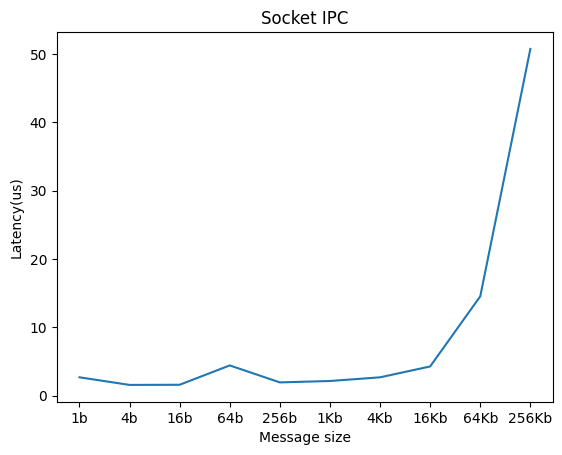

In [43]:
# Read map information from JSON file
with open('build/json/socket.json', 'r') as file:
    map_data = json.load(file)

# Calculate the mean for each list of doubles in the map
mean_map = {int(key): np.mean(values) for key, values in map_data.items()}

# Sort the mean_map based on the keys in ascending order
sorted_map = {str(k)+'b' if k < 1024 else str(k // 1024)+'Kb': mean_map[k] for k in sorted(mean_map)}

# Extract relevant information from the sorted_map
x_values = list(sorted_map.keys())
y_values = list(sorted_map.values())

# Plot the data
plt.plot(x_values, y_values)
plt.xlabel('Message size')
plt.ylabel('Latency(us)')
plt.title('Socket IPC')
plt.show()